In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\r\n\r\n\r\n We...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\r\n\r\n\r\n Ma...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\r\n\r\n\r\n Th...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\r\n\r\n\r\n AI...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\r\n\r\n\r\n Th...,4592.592593


In [4]:
df.shape

(7738, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [6]:
df.columns

Index(['Unnamed: 0', 'price', 'Address', 'area', 'latitude', 'longitude',
       'Bedrooms', 'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')

In [7]:
# Removing Unwanted columns
rem_cols = ['Unnamed: 0','Landmarks','desc']
df = df.drop(columns=rem_cols)

### Handling Null Values

In [8]:
df.isnull().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
type_of_building       0
Price_sqft             0
dtype: int64

In [9]:
df.columns

Index(['price', 'Address', 'area', 'latitude', 'longitude', 'Bedrooms',
       'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'type_of_building', 'Price_sqft'],
      dtype='object')

##### Balcony

In [10]:
df.isna().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
type_of_building       0
Price_sqft             0
dtype: int64

In [11]:
# We can't determine how many balconies for that we placing 0 for null values
df['Balcony'] = df['Balcony'].fillna(0)

##### Status

In [12]:
df.isna().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony                0
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
type_of_building       0
Price_sqft             0
dtype: int64

In [13]:
df['Status'].unique()

array(['Under Construction', 'Ready to Move', nan], dtype=object)

In [14]:
stat_mode = df['Status'].mode()
stat_mode

0    Ready to Move
Name: Status, dtype: object

In [15]:
df['Status'] = df['Status'].fillna(stat_mode)[0]

##### parking

In [16]:
df.isna().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony                0
Status                 0
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
type_of_building       0
Price_sqft             0
dtype: int64

In [17]:
df['parking'].unique()

array([      nan, 1.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 1.230e+02,
       1.000e+01, 7.000e+00, 7.020e+02, 6.000e+00, 1.100e+01, 5.000e+00,
       2.030e+02, 1.240e+02, 7.870e+02, 9.200e+01, 5.020e+02, 8.040e+02,
       8.000e+00, 3.200e+01, 3.300e+01, 5.500e+01, 1.610e+02, 5.120e+02,
       4.500e+02, 9.000e+00, 1.000e+02, 8.350e+02, 4.300e+01, 5.320e+02,
       1.940e+02, 2.580e+02, 1.800e+01, 2.500e+01, 6.020e+02, 1.600e+01,
       6.240e+02, 8.700e+01, 9.100e+01, 1.200e+01, 1.010e+02, 2.650e+02,
       1.630e+02, 4.450e+02, 1.406e+03, 4.020e+02, 7.500e+02, 1.050e+03,
       5.400e+01, 1.300e+02, 7.030e+02, 3.740e+02, 6.600e+01, 2.300e+01,
       2.200e+02, 1.600e+02, 2.300e+02, 3.400e+01, 1.190e+02, 3.380e+02,
       1.030e+02, 2.000e+01, 1.450e+02, 9.900e+01, 3.030e+02, 1.790e+02])

In [18]:
# Parking is also a static element
df['parking'] = df['parking'].fillna(0)

##### Furnished_status

In [19]:
df.isna().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony                0
Status                 0
neworold               0
parking                0
Furnished_status    3614
Lift                6005
type_of_building       0
Price_sqft             0
dtype: int64

In [20]:
df['Furnished_status'].unique()

array([nan, 'Semi-Furnished', 'Unfurnished', 'Furnished'], dtype=object)

In [21]:
fur_mode = df['Furnished_status'].mode()[0]
df['Furnished_status'] = df['Furnished_status'].fillna(fur_mode)

##### Lift

In [22]:
df.isna().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony                0
Status                 0
neworold               0
parking                0
Furnished_status       0
Lift                6005
type_of_building       0
Price_sqft             0
dtype: int64

In [23]:
df['Lift'].unique()

array([ 2., nan,  3.,  1.,  0.,  5.,  4.,  6., 10.,  7.,  8.,  9.])

In [24]:
# Lift is a static element so we filling it with 0
df['Lift'] = df['Lift'].fillna(0)

In [25]:
df.isna().sum()

price               0
Address             0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
parking             0
Furnished_status    0
Lift                0
type_of_building    0
Price_sqft          0
dtype: int64

### Handling Inconsistencies

In [26]:
df.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,0.0,Under Construction,New Property,0.0,Semi-Furnished,2.0,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,0.0,Under Construction,New Property,0.0,Semi-Furnished,2.0,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,0.0,Under Construction,New Property,1.0,Unfurnished,0.0,Flat,6918.238994
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,Under Construction,New Property,1.0,Unfurnished,2.0,Flat,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Under Construction,Resale,1.0,Semi-Furnished,3.0,Flat,4592.592593


In [27]:
df['Status'].unique()

array(['Under Construction'], dtype=object)

In [28]:
df['neworold'].unique()

array(['New Property', 'Resale'], dtype=object)

In [29]:
df['Furnished_status'].unique()

array(['Semi-Furnished', 'Unfurnished', 'Furnished'], dtype=object)

In [30]:
df['type_of_building'].unique()

array(['Flat', 'Individual House'], dtype=object)

In [31]:
df['Price_sqft']

0       4148.148148
1       5906.040268
2       6918.238994
3       3628.571429
4       4592.592593
           ...     
7733    7214.611872
7734    4254.716981
7735    3688.092729
7736    4642.857143
7737    3714.285714
Name: Price_sqft, Length: 7738, dtype: float64

In [32]:
# want to round price_sqft column to 3 decimales from 6 decimales
df['Price_sqft'] = round(df['Price_sqft'],3)

In [33]:
df['Price_sqft']

0       4148.148
1       5906.040
2       6918.239
3       3628.571
4       4592.593
          ...   
7733    7214.612
7734    4254.717
7735    3688.093
7736    4642.857
7737    3714.286
Name: Price_sqft, Length: 7738, dtype: float64

##### There are no much inconcistencies

### Handling Data Types

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   Address           7738 non-null   object 
 2   area              7738 non-null   float64
 3   latitude          7738 non-null   float64
 4   longitude         7738 non-null   float64
 5   Bedrooms          7738 non-null   float64
 6   Bathrooms         7738 non-null   float64
 7   Balcony           7738 non-null   float64
 8   Status            7738 non-null   object 
 9   neworold          7738 non-null   object 
 10  parking           7738 non-null   float64
 11  Furnished_status  7738 non-null   object 
 12  Lift              7738 non-null   float64
 13  type_of_building  7738 non-null   object 
 14  Price_sqft        7738 non-null   float64
dtypes: float64(10), object(5)
memory usage: 906.9+ KB


In [35]:
# Handling the columns which are in the data types where they aren't
df['price'] = df['price'].astype(int) # Now we are not using pisas

# These columns are not want to goes under mathematical operations
df['latitude'] = df['latitude'].astype(object)
df['longitude'] = df['longitude'].astype(object)

#These are counting items
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(int)
df['Balcony'] = df['Balcony'].astype(int)
df['parking'] = df['parking'].astype(int)
df['Lift'] = df['Lift'].astype(int)

In [36]:
df.head(2)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
0,5600000,"Noida Extension, Noida, Delhi NCR",1350.0,28.60885,77.46056,3,3,0,Under Construction,New Property,0,Semi-Furnished,2,Flat,4148.148
1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3,3,0,Under Construction,New Property,0,Semi-Furnished,2,Flat,5906.040


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   int64  
 1   Address           7738 non-null   object 
 2   area              7738 non-null   float64
 3   latitude          7738 non-null   object 
 4   longitude         7738 non-null   object 
 5   Bedrooms          7738 non-null   int64  
 6   Bathrooms         7738 non-null   int64  
 7   Balcony           7738 non-null   int64  
 8   Status            7738 non-null   object 
 9   neworold          7738 non-null   object 
 10  parking           7738 non-null   int64  
 11  Furnished_status  7738 non-null   object 
 12  Lift              7738 non-null   int64  
 13  type_of_building  7738 non-null   object 
 14  Price_sqft        7738 non-null   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 906.9+ KB


### Droping duplicates

In [38]:
df.shape

(7738, 15)

In [39]:
distict_cols = ['latitude','longitude','Address','Bathrooms','Bedrooms','type_of_building']
df = df.drop_duplicates(subset=distict_cols)

In [40]:
df.shape

(6527, 15)

##### Out of 7738 rows we ended up with 6213

### Handling Outliers

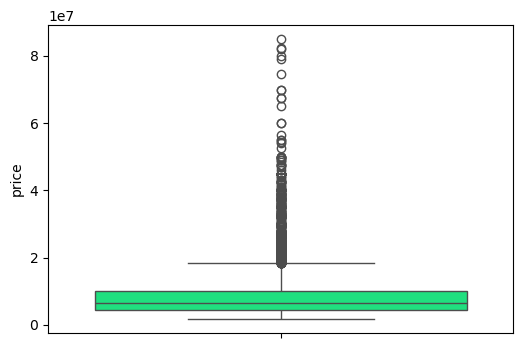

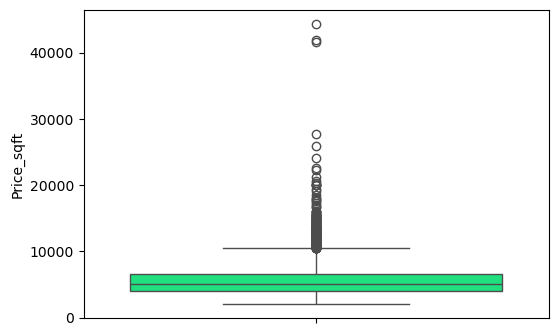

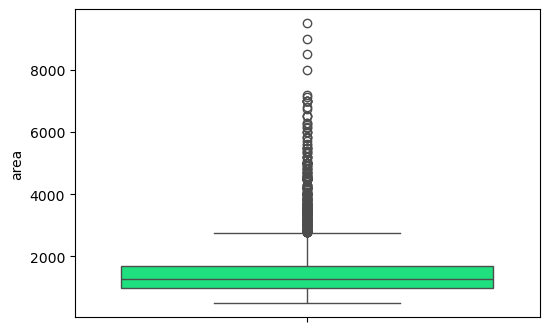

In [41]:
# Plots before eleminating outliers
cols = ['price','Price_sqft','area']

for i in cols :
    plt.figure(figsize=(6,4))
    sns.boxplot(df[i],color='springgreen')

##### Lower Bound need not to be handled

In [42]:
# Price
q1 = np.percentile(df['price'],25)
q3 = np.percentile(df['price'],75)
iqr = q3 - q1

lf = q1 - 1.5 * iqr
uf = q1 + 1.5 * iqr

print(lf,uf)

-4100000.0 12820000.0


In [43]:
df.loc[df['price'] > uf,'price'] = uf.astype(int)

In [44]:
# Price_sqft
q1 = np.percentile(df['Price_sqft'],25)
q3 = np.percentile(df['Price_sqft'],75)
iqr = q3 - q1

lf = q1 - 1.5 * iqr
uf = q1 + 1.5 * iqr

print(lf,uf)

97.93074999999999 7902.0692500000005


In [45]:
df.loc[df['Price_sqft'] > uf,'Price_sqft'] = round(uf,3)

In [46]:
# area
q1 = np.percentile(df['area'],25)
q3 = np.percentile(df['area'],75)
iqr = q3 - q1

lf = q1 - 1.5 * iqr
uf = q1 + 1.5 * iqr

print(lf,uf)

-50.0 2050.0


In [47]:
df.loc[df['area'] > uf,'area'] = uf

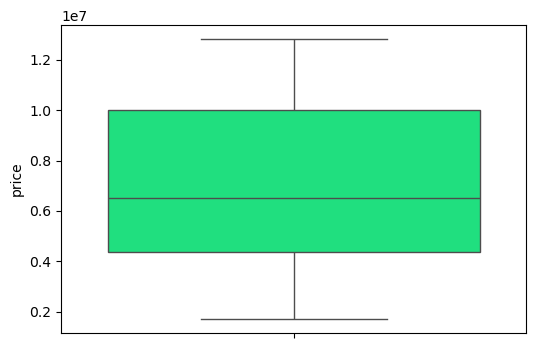

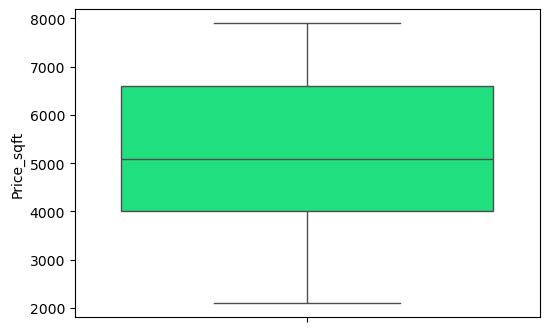

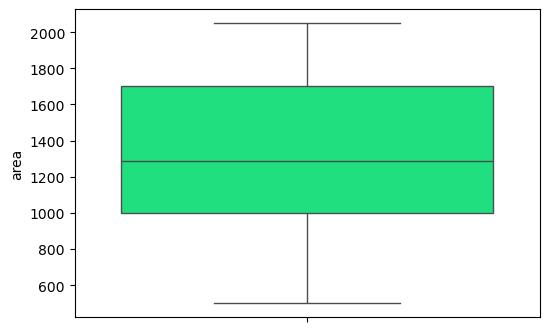

In [48]:
# Plots after eleminating outliers
cols = ['price','Price_sqft','area']

for i in cols :
    plt.figure(figsize=(6,4))
    sns.boxplot(df[i],color='springgreen')

### Feature Extraction

In [49]:
df.head(2)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft
0,5600000,"Noida Extension, Noida, Delhi NCR",1350.0,28.60885,77.46056,3,3,0,Under Construction,New Property,0,Semi-Furnished,2,Flat,4148.148
1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3,3,0,Under Construction,New Property,0,Semi-Furnished,2,Flat,5906.040


##### Removing Some Stuff from Address

In [50]:
df.loc[20,'Address']

'Sector 37C, Gurgaon, Delhi NCR'

In [51]:
df['locality'] = df['Address'].apply(lambda x: ','.join(x.split(',')[:-2]).strip())
df['Division'] = df['Address'].apply(lambda x: x.split(',')[-2].strip())
df['State'] = df['Address'].apply(lambda x: x.split(',')[-1].strip())

In [52]:
df['locality'].value_counts()

locality
Raj Nagar Extension                                                                         83
Noida Extension                                                                             70
Indirapuram                                                                                 68
Greater Noida West                                                                          67
Crossings Republik                                                                          42
                                                                                            ..
Sector 152                                                                                   1
flat no 003 tower B Supertech Livingston Crossings RepublikGhaziabad, Crossings Republik     1
1602., Sector 1                                                                              1
Neharpar                                                                                     1
Omicron-3, Greater Noida., Omicron 3     

In [53]:
df['Division'].value_counts()

Division
Gurgaon                1603
Ghaziabad              1581
Noida                   943
Greater Noida           767
Faridabad               410
New Delhi - West        400
New Delhi - South       310
New Delhi - Dwarka      180
New Delhi - East        175
New Delhi - Rohini       81
New Delhi - North        53
New Delhi - Central      11
New Delhi                 7
Gurgaon - South           5
Gurgaon - North           1
Name: count, dtype: int64

In [54]:
df['State'].value_counts()

State
Delhi NCR        6525
Uttar Pradesh       2
Name: count, dtype: int64

In [55]:
df.head(2)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,locality,Division,State
0,5600000,"Noida Extension, Noida, Delhi NCR",1350.0,28.60885,77.46056,3,3,0,Under Construction,New Property,0,Semi-Furnished,2,Flat,4148.148,Noida Extension,Noida,Delhi NCR
1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3,3,0,Under Construction,New Property,0,Semi-Furnished,2,Flat,5906.040,Sector 79,Gurgaon,Delhi NCR


In [56]:
df['State'].unique()

array(['Delhi NCR', 'Uttar Pradesh'], dtype=object)

In [57]:
# Removing UP records
df = df.loc[df['State'] != ' Uttar Pradesh']

In [58]:
df['State'].value_counts()

State
Delhi NCR        6525
Uttar Pradesh       2
Name: count, dtype: int64

In [59]:
df['Division'].value_counts()

Division
Gurgaon                1603
Ghaziabad              1581
Noida                   943
Greater Noida           767
Faridabad               410
New Delhi - West        400
New Delhi - South       310
New Delhi - Dwarka      180
New Delhi - East        175
New Delhi - Rohini       81
New Delhi - North        53
New Delhi - Central      11
New Delhi                 7
Gurgaon - South           5
Gurgaon - North           1
Name: count, dtype: int64

In [60]:
final_4_direction_mapping = {
    # UP CITIES (EAST & NORTHEAST -> EAST)
    'Ghaziabad': 'east',
    'Noida': 'east',
    'Greater Noida': 'east',
    'Gautam Buddh Nagar': 'east',
    'Hapur': 'east',      # Northeast consolidated to East
    'Meerut': 'east',     # Northeast consolidated to East
    'Baghpat': 'east',    # Northeast consolidated to East
    'Bulandshahr': 'east',
    'Muzaffarnagar': 'east',
    
    # RAJASTHAN CITIES (SOUTHEAST -> EAST)
    'Alwar': 'east',      # Southeast consolidated to East
    'Bharatpur': 'east',  # Southeast consolidated to East
    
    # HARYANA CITIES (WEST, NORTHWEST, SOUTHWEST -> WEST, NORTH, SOUTH)
    'Sonipat': 'north',   # Remains North
    'Panipat': 'north',   # Remains North
    
    'Rohtak': 'west',     # Northwest consolidated to West
    'Jhajjar': 'west',    # Northwest consolidated to West
    'Rewari': 'west',     # Remains West
    'Mahendragarh': 'west',
    
    'Gurugram': 'west',   # Southwest consolidated to West (due to proximity to Delhi's West)
    'Gurgaon': 'west',
    
    'Faridabad': 'south', # Remains South
    'Palwal': 'south',    # Remains South

    # DELHI DISTRICTS (ALL MAPPED TO 'core')
    'East Delhi': 'core',
    'West Delhi': 'core',
    'South Delhi': 'core',
    'North Delhi': 'core',
    'North West Delhi': 'core',
    'North East Delhi': 'core',
    'South West Delhi': 'core',
    'South East Delhi': 'core',
    'Central Delhi': 'core',
    'New Delhi': 'core',
    'Shahdara': 'core' 
}

In [61]:
df['region'] = df['Division'].str.strip().map(final_4_direction_mapping)

In [62]:
df.isna().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony                0
Status                 0
neworold               0
parking                0
Furnished_status       0
Lift                   0
type_of_building       0
Price_sqft             0
locality               0
Division               0
State                  0
region              1216
dtype: int64

In [63]:
df['region'].value_counts()

region
east     3291
west     1603
south     410
core        7
Name: count, dtype: int64

In [64]:
def map_region_to_4_directions(latitude, longitude):
    """
    Maps a given Latitude and Longitude pair to one of five simplified 
    NCR regions (Core, North, South, East, West) based on quadrants.
    
    Args:
        latitude (float): The latitude value of the location.
        longitude (float): The longitude value of the location.
        
    Returns:
        str: The determined regional label (core, north, south, east, or west).
    """
    
    # 1. Define the approximate geographic center for the NCR split
    LATITUDE_CENTER = 28.60  # Approx. center of Delhi
    LONGITUDE_CENTER = 77.20 # Approx. line of the Yamuna River
    
    # 2. Define the 'Core' boundary (Area immediately surrounding Central Delhi)
    # These are illustrative bounds; adjust them if your data's 'core' cluster is different.
    CORE_LAT_MIN = 28.50
    CORE_LAT_MAX = 28.75
    CORE_LON_MIN = 77.10
    CORE_LON_MAX = 77.30
    
    # --- Check for CORE Region First ---
    if (CORE_LAT_MIN <= latitude <= CORE_LAT_MAX and 
        CORE_LON_MIN <= longitude <= CORE_LON_MAX):
        return 'core'

    # --- Check for 4 Main Directions ---
    
    # EAST (All points east of the Longitude Center)
    if longitude >= LONGITUDE_CENTER:
        # Group both Northeast and Southeast into 'east'
        return 'east'
            
    # WEST (All points west of the Longitude Center)
    else: # longitude < LONGITUDE_CENTER
        # We must decide if the remaining point is NORTH or SOUTH
        if latitude > LATITUDE_CENTER:
            # Northwest grouped into 'north'
            return 'north'
        else:
            # Southwest grouped into 'south'
            return 'south'
            
    # Fallback return, though typically unreachable
    return np.nan

In [65]:
df.loc[df['region'].isna(), 'region'] = df[df['region'].isna()].apply(
	lambda row: map_region_to_4_directions(float(row['latitude']), float(row['longitude'])), 
	axis=1
)

In [66]:
df.isna().sum()

price               0
Address             0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
parking             0
Furnished_status    0
Lift                0
type_of_building    0
Price_sqft          0
locality            0
Division            0
State               0
region              0
dtype: int64

In [67]:
df['region'].value_counts()

region
east     3377
west     1603
core      607
south     585
north     355
Name: count, dtype: int64

In [68]:
df['Division'].value_counts()

Division
Gurgaon                1603
Ghaziabad              1581
Noida                   943
Greater Noida           767
Faridabad               410
New Delhi - West        400
New Delhi - South       310
New Delhi - Dwarka      180
New Delhi - East        175
New Delhi - Rohini       81
New Delhi - North        53
New Delhi - Central      11
New Delhi                 7
Gurgaon - South           5
Gurgaon - North           1
Name: count, dtype: int64

In [69]:
# Removing unwanted columns
df[df['Address'].str.contains('Sector ')]

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,locality,Division,State,region
1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3,3,0,Under Construction,New Property,0,Semi-Furnished,2,Flat,5906.040,Sector 79,Gurgaon,Delhi NCR,west
3,3810000,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2,2,3,Under Construction,New Property,1,Unfurnished,2,Flat,3628.571,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",Greater Noida,Delhi NCR,east
4,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2,2,3,Under Construction,Resale,1,Semi-Furnished,3,Flat,4592.593,"Jaypee Pavilion Court Sector 128, Noida, Secto...",Noida,Delhi NCR,east
6,3270000,"Nirala Aspire, GH03, Sector 16C, Hundal, Great...",890.0,28.610645,77.455837,2,2,3,Under Construction,Resale,1,Semi-Furnished,2,Flat,3674.157,"Nirala Aspire, GH03, Sector 16C, Hundal, Great...",Noida,Delhi NCR,east
7,3990000,"Suncity Avenue 102, Sector 102, Gurgaon Bang o...",850.0,28.471233,76.969597,2,2,1,Under Construction,Resale,1,Semi-Furnished,0,Flat,4694.118,"Suncity Avenue 102, Sector 102, Gurgaon Bang o...",Gurgaon,Delhi NCR,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7727,4400000,"514., Sector 4, Greater Noida, Delhi NCR",980.0,28.610935,77.429495,2,2,3,Under Construction,Resale,1,Semi-Furnished,0,Flat,4489.796,"514., Sector 4",Greater Noida,Delhi NCR,east
7728,5200000,"Sector 2 Rajendra Nagar, Ghaziabad, Delhi NCR",900.0,28.687614,77.351924,3,2,1,Under Construction,Resale,0,Unfurnished,0,Flat,5777.778,Sector 2 Rajendra Nagar,Ghaziabad,Delhi NCR,east
7729,8100000,"C16-02, C- Block, Bptp Parklands, Sec -85, Gre...",1600.0,28.404231,77.355956,3,3,3,Under Construction,Resale,2,Semi-Furnished,1,Flat,5062.500,"C16-02, C- Block, Bptp Parklands, Sec -85, Gre...",Faridabad,Delhi NCR,south
7732,6200000,"Sector137 Noida Paramount Floraville, Sector 1...",1045.0,28.509208,77.406626,2,2,4,Under Construction,Resale,1,Semi-Furnished,2,Flat,5933.014,"Sector137 Noida Paramount Floraville, Sector 137",Noida,Delhi NCR,east


In [70]:
df = df.drop(columns=['State','Address'])

In [71]:
df.head(2)

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,type_of_building,Price_sqft,locality,Division,region
0,5600000,1350.0,28.60885,77.46056,3,3,0,Under Construction,New Property,0,Semi-Furnished,2,Flat,4148.148,Noida Extension,Noida,east
1,8800000,1490.0,28.374236,76.952416,3,3,0,Under Construction,New Property,0,Semi-Furnished,2,Flat,5906.040,Sector 79,Gurgaon,west


In [72]:
cleaned_df = df[['price','Price_sqft','locality','Division','region','latitude','longitude','area','Status','neworold','parking','Bedrooms','Bathrooms','Balcony','Lift','Furnished_status','type_of_building']]
cleaned_df.to_csv('cleaned_data.csv')

##### The End